<div class="alert alert-block alert-info">  
    <h1><strong>👨‍💻 Getting Started with House Price Predictions</strong></h1>
    <i></i>
</div>

# <img src="https://www.mashvisor.com/blog/wp-content/uploads/2019/01/bigstock-Paper-House-Model-On-Coins-Sta-279182236-e1547969753106.jpg">

# Importing Python Libraries 📕 📗 📘 📙

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec
import missingno as msno
import scipy.stats as stats 
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-danger">  
    <h1><strong>Loading training data</strong></h1>
    <i></i>
</div>

In [2]:
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

# Exploratory data analysis of train data

# Five top records of data

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Five last records of data

In [4]:
train_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


# Coloumns/features in data

In [5]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Length of data

In [6]:
print('lenght of data is', len(train_data))

lenght of data is 1460


# Shape of data

In [7]:
train_data.shape

(1460, 81)

# Data information

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data types of all coloumns

In [9]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# Checking missing Values

In [10]:
train_data[train_data.isnull().any(axis=1)].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Count of missing values

In [11]:
np.sum(train_data.isnull().any(axis=1))

1460

# Is there any missing values?

In [12]:
train_data.isnull().values.any()

True

# Counts of missing values in each column

In [13]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<div class="alert alert-block alert-danger">  
    <h1><strong>Loading testing data</strong></h1>
    <i></i>
</div>

In [14]:
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
ids_test_data = test_data['Id'].values

# Exploratory data analysis of test data

# Five top records of data

In [15]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Five last records of data

In [16]:
test_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


# Coloumns/features in data

In [17]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Length of data

In [18]:
print('lenght of data is', len(test_data))

lenght of data is 1459


# Shape of data

In [19]:
test_data.shape

(1459, 80)

# Data information

In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Data types of all coloumns

In [21]:
test_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

# Checking missing Values

In [22]:
test_data[test_data.isnull().any(axis=1)].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Count of missing values

In [23]:
np.sum(test_data.isnull().any(axis=1))

1459

# Is there any missing values?

In [24]:
test_data.isnull().values.any()

True

# Counts of missing values in each column

In [25]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

# Looking at the train data missing values.

In [26]:
NANColumns=[]
i=-1
for a in train_data.isnull().sum():
    i+=1
    if a!=0:
        print(train_data.columns[i],a)
        NANColumns.append(train_data.columns[i])

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


# Looking at the test data missing values.

In [27]:
NANColumns=[]
i=-1
for a in test_data.isnull().sum():
    i+=1
    if a!=0:
        print(test_data.columns[i],a)
        NANColumns.append(test_data.columns[i])

MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


# Hitogram of all columns where we are going to check that how the values of each column distributed with their counts

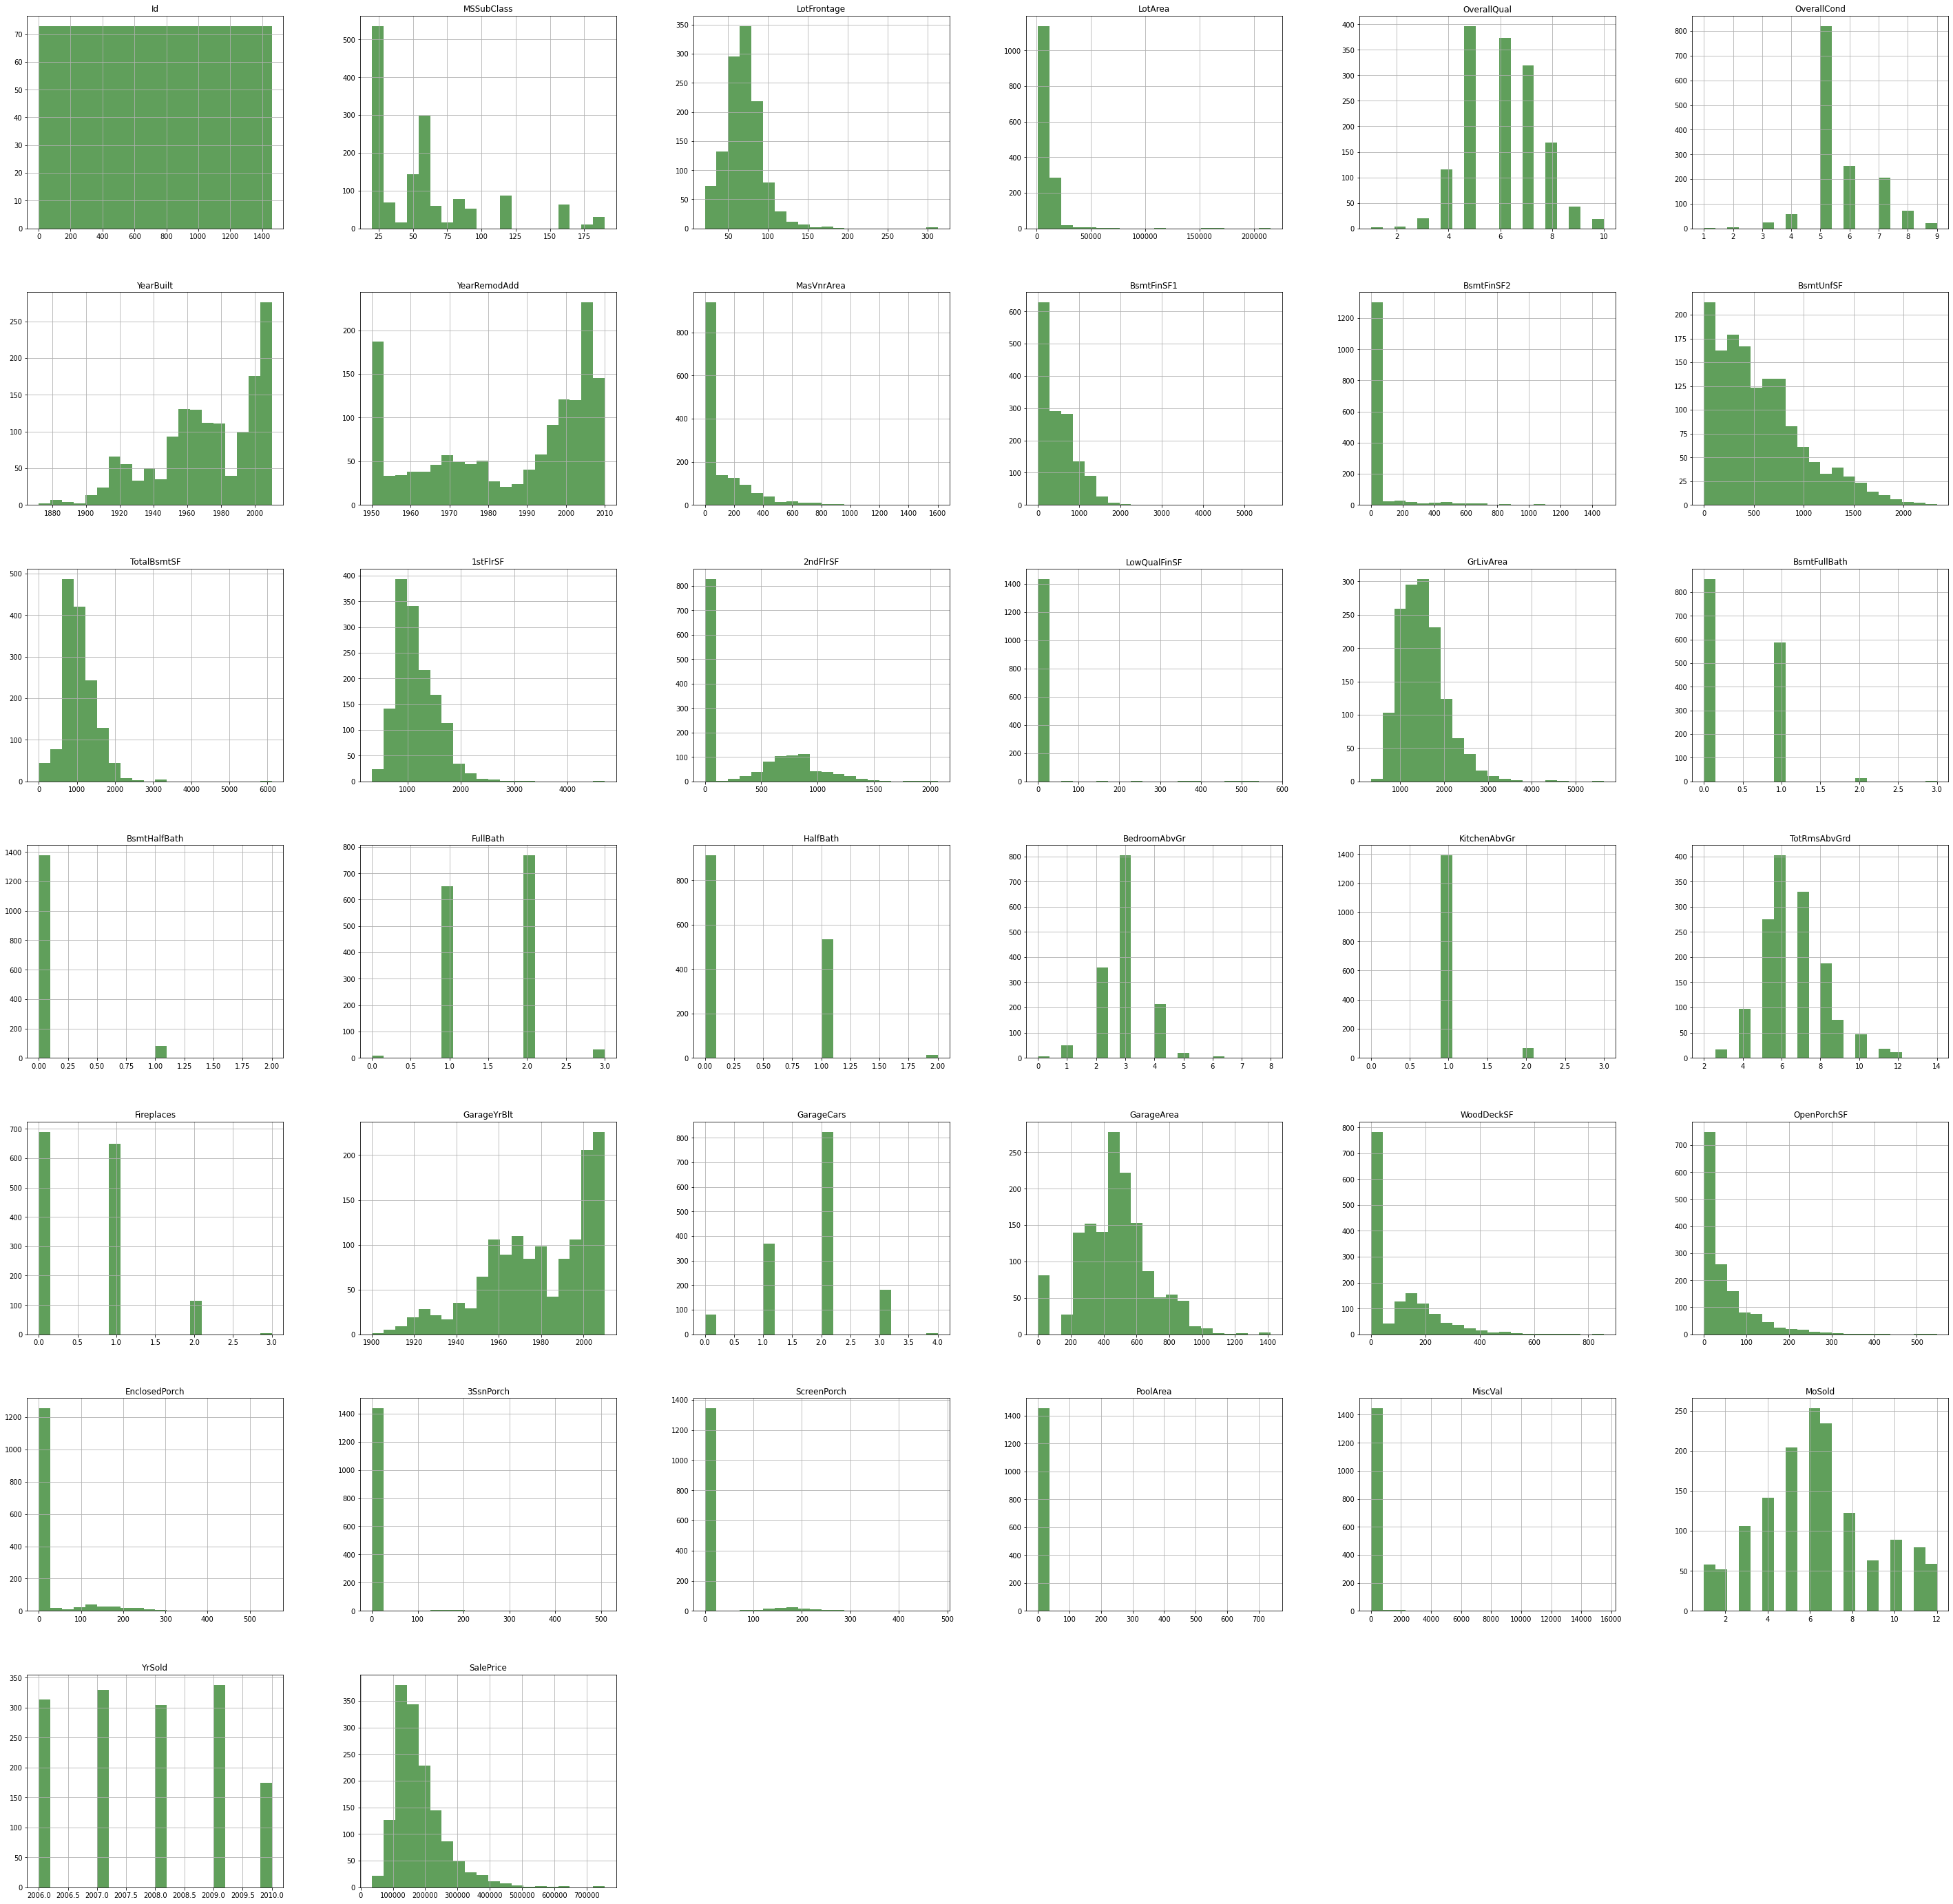

In [28]:
train_data.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Features/Columns Distribution with values counts")
plt.show()

# Looking at the Temporal data (temporal data is relating to time data, we are here looking at the past data) 

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


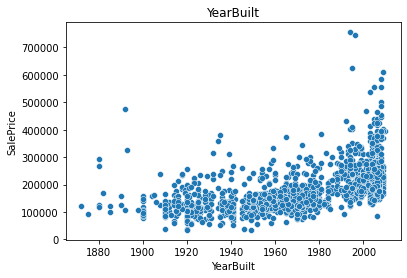

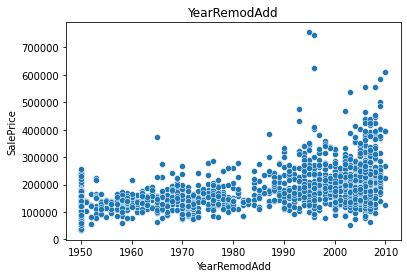

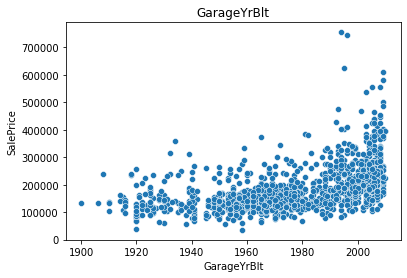

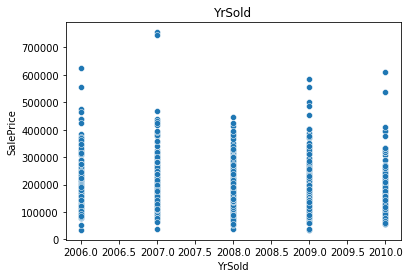

In [29]:
temporal_features = [feat for feat in train_data if "Year" in feat or "Yr" in feat]
print(temporal_features)
for feature in temporal_features:
    sns.scatterplot(x=feature,y="SalePrice",data=train_data)
    plt.title(feature)
    plt.show()

# Looking at the Discrete and Continuous features

In [30]:
#HERE condition less than 6 is the unique count of temporal features.  "rain_data[feature].nunique() < 6" return true
discrete_features = [feature for feature in train_data if train_data[feature].nunique() < 6 and feature not in temporal_features]
continuous_features = [feature for feature in train_data if feature not in discrete_features and feature not in temporal_features]

print("Discrete_Features:\n",discrete_features)
print("Continuous_Features:\n",continuous_features)

Discrete_Features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature']
Continuous_Features:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'S

# Scatter plot of each feature against Sale price on discrete features

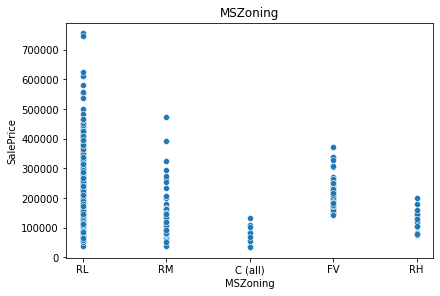

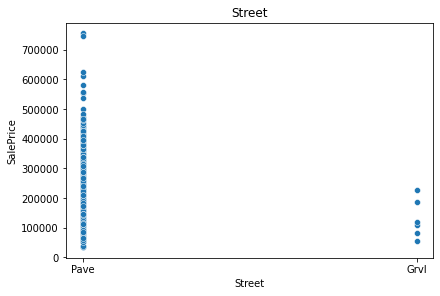

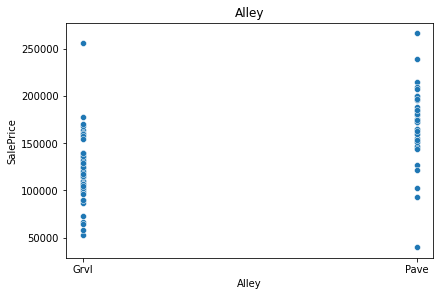

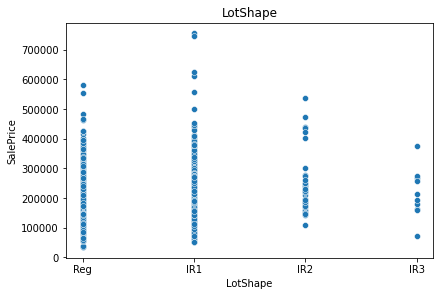

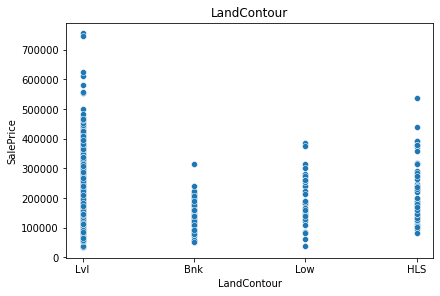

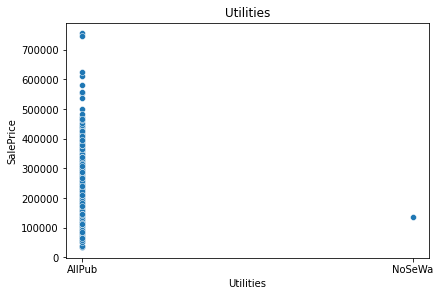

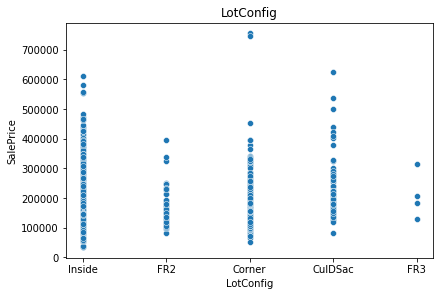

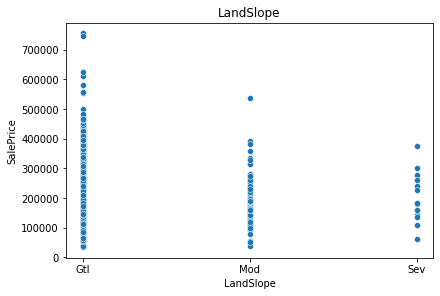

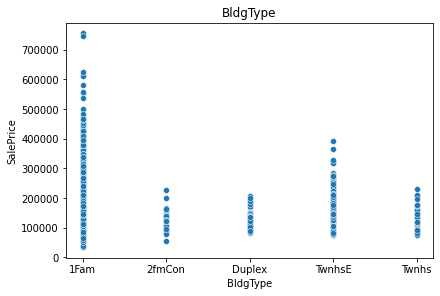

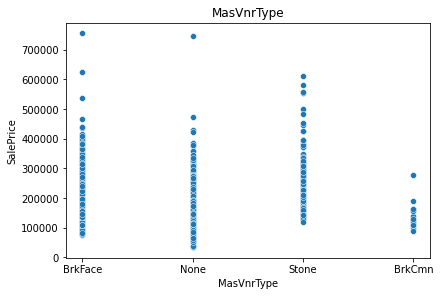

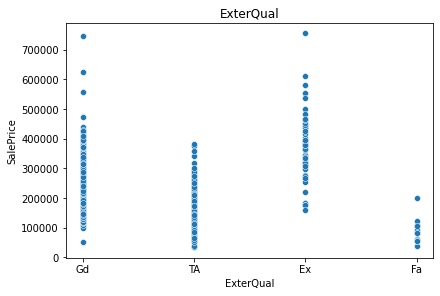

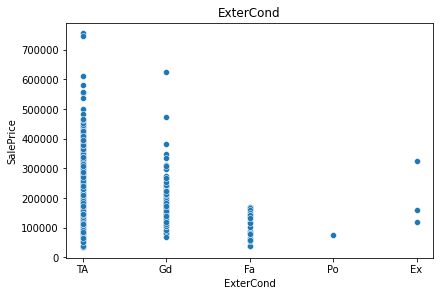

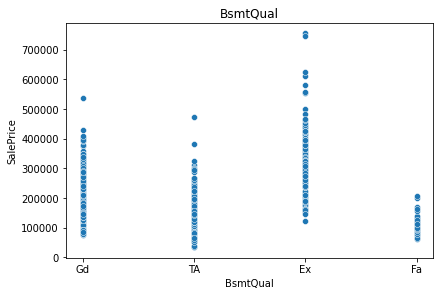

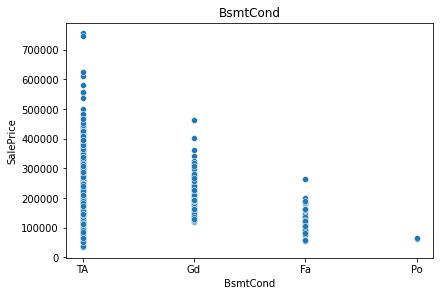

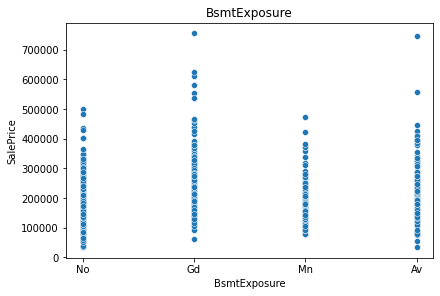

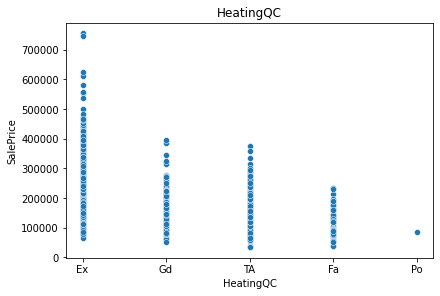

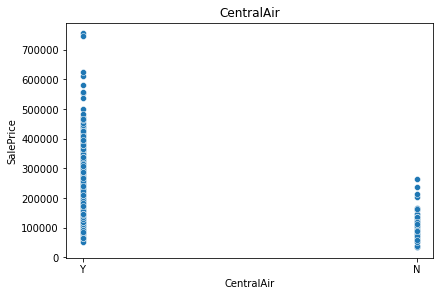

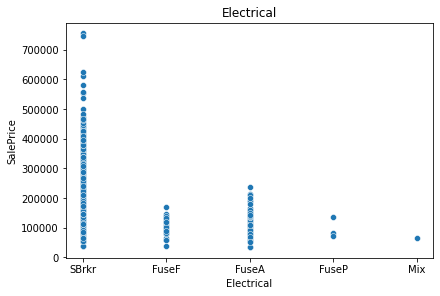

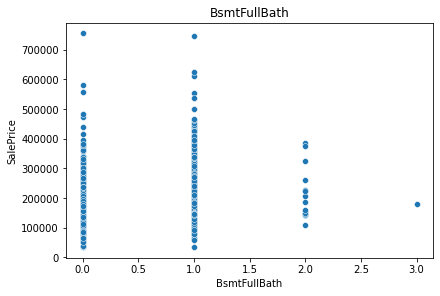

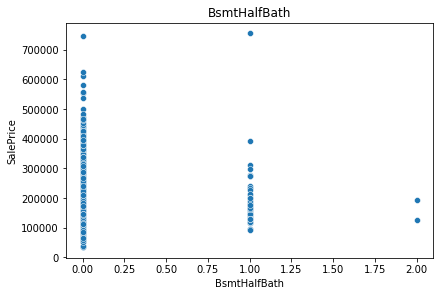

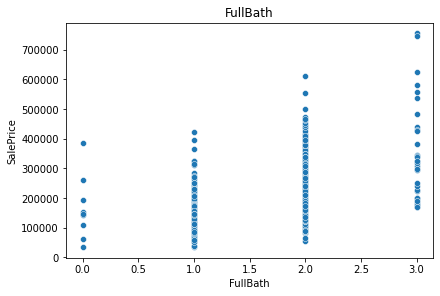

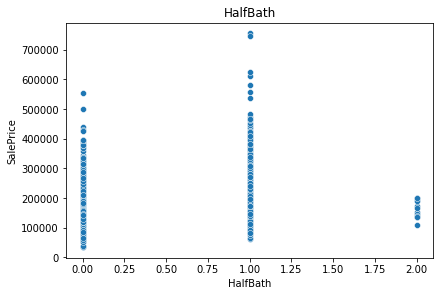

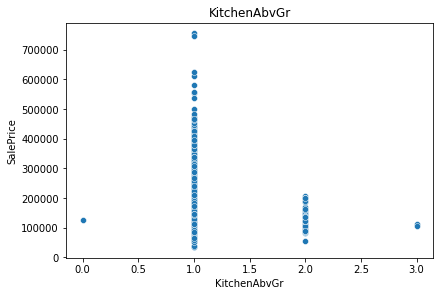

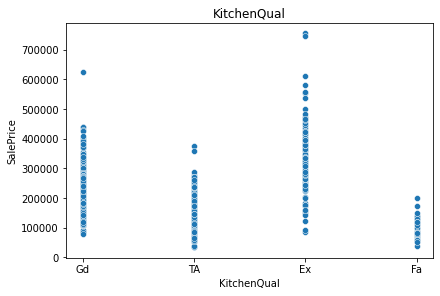

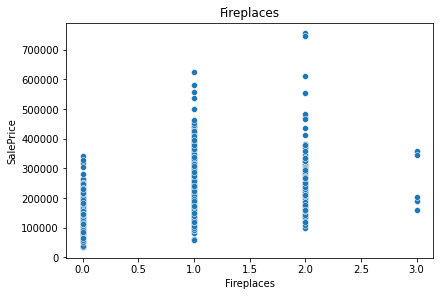

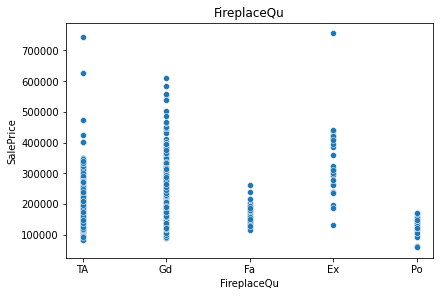

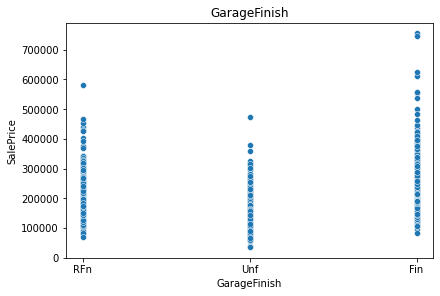

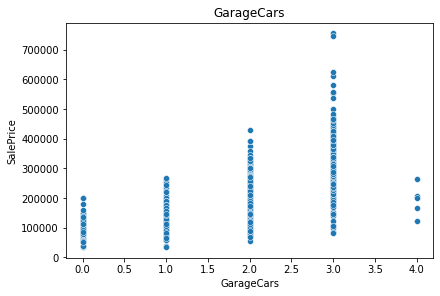

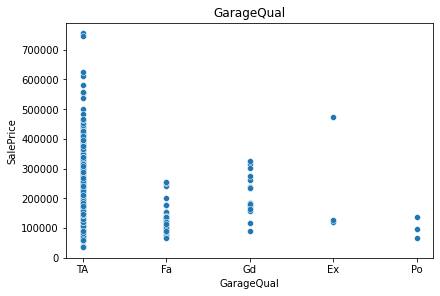

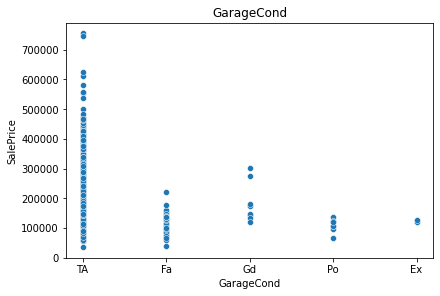

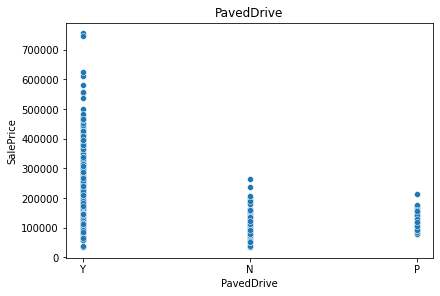

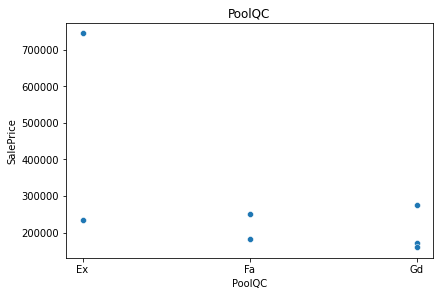

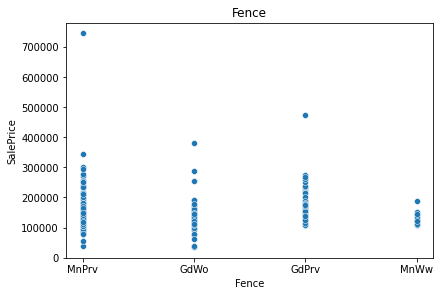

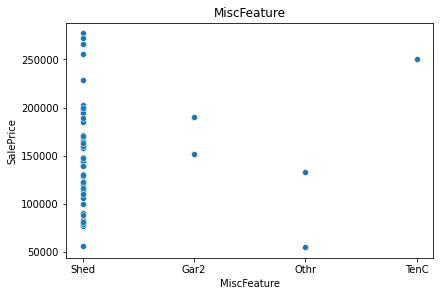

In [31]:
def scatterplot(df,feature,target_feature):
    plt.figure(constrained_layout=True)
    sns.scatterplot(df[feature],df[target_feature])
    plt.title(feature)
    plt.show()
for feat in discrete_features:
    scatterplot(train_data,feat,"SalePrice")


<div class="alert alert-block alert-danger">  
<h2><center><strong>As we can see from the graphs, OverallQual, OverallCond, FullBath, TotRmsAbvGrd and GarageCars have stong correlation with SalePrice</strong></center></h2>
        
</div>

# Scatter plot of each feature against Sale price on continuous features

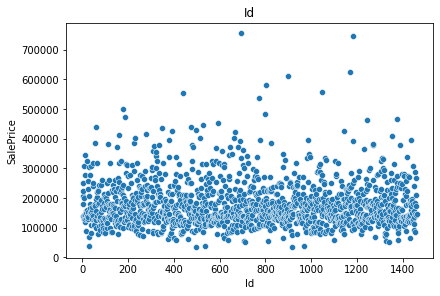

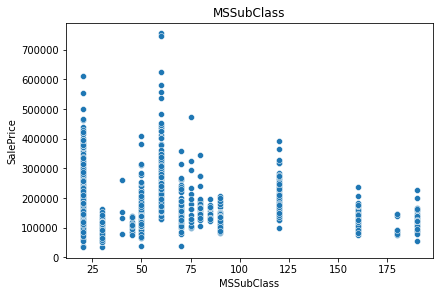

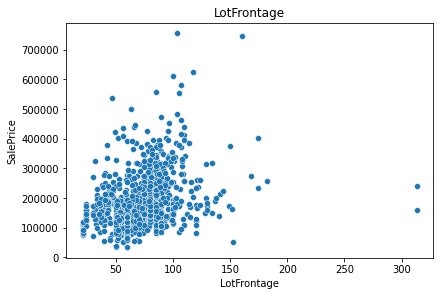

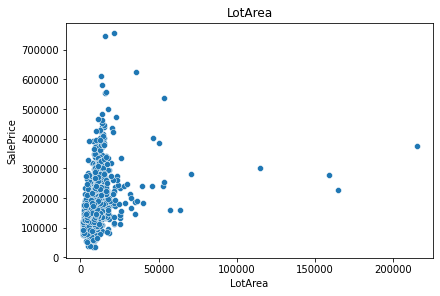

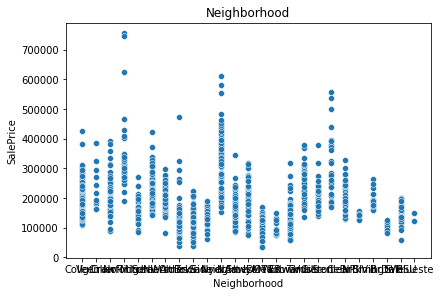

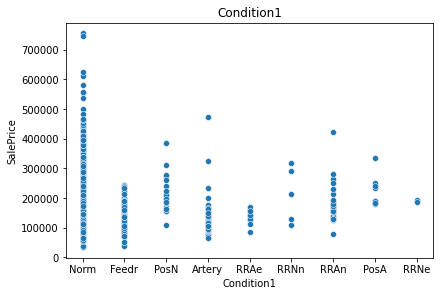

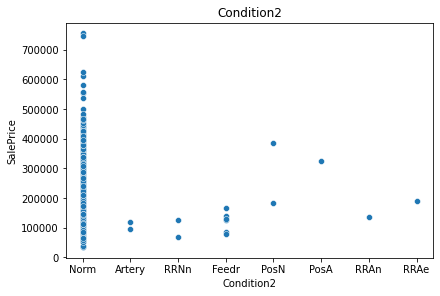

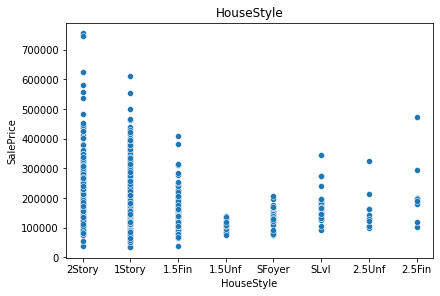

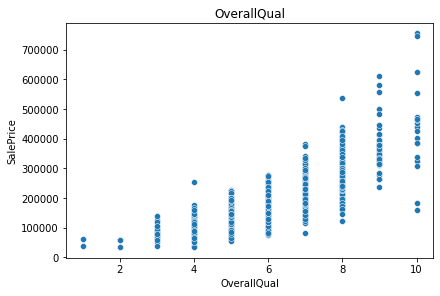

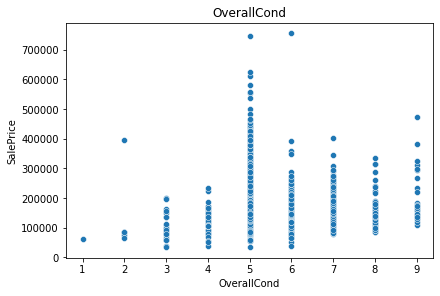

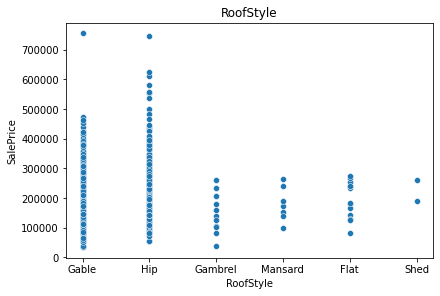

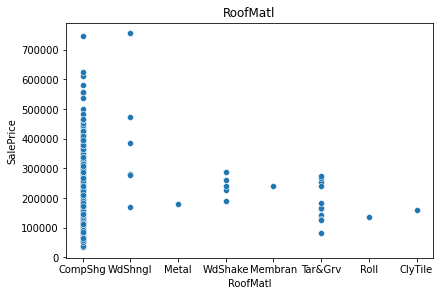

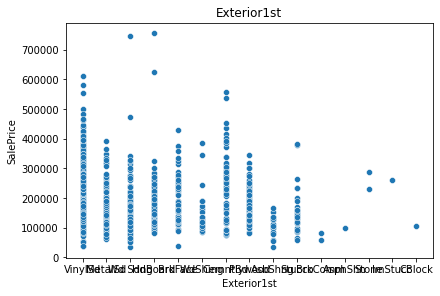

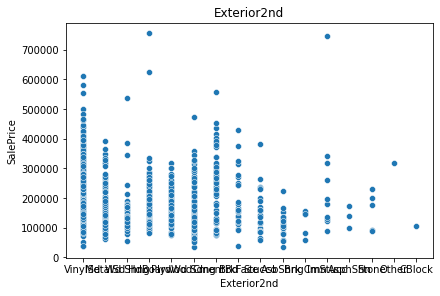

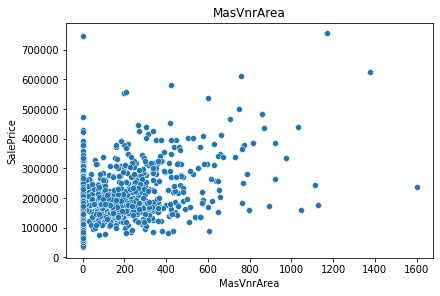

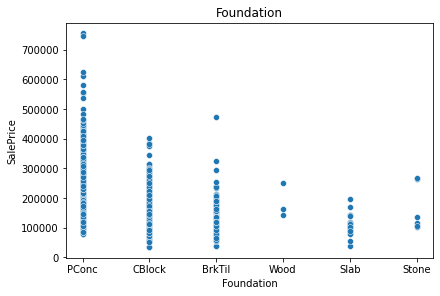

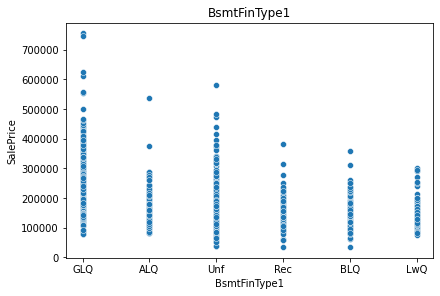

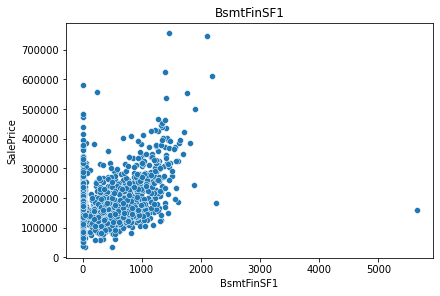

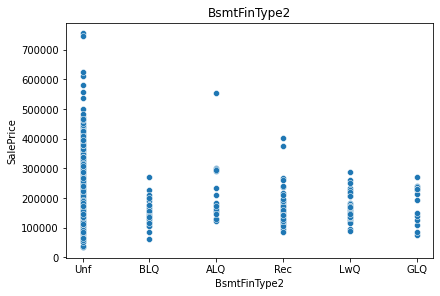

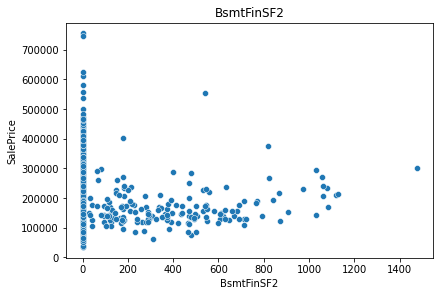

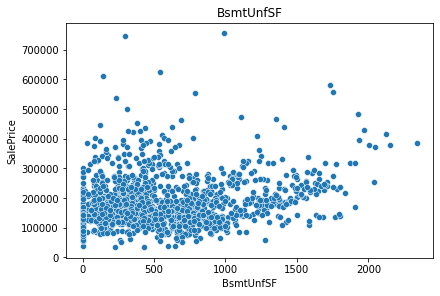

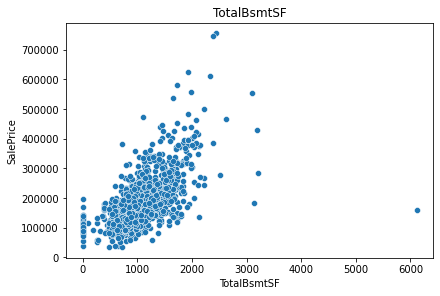

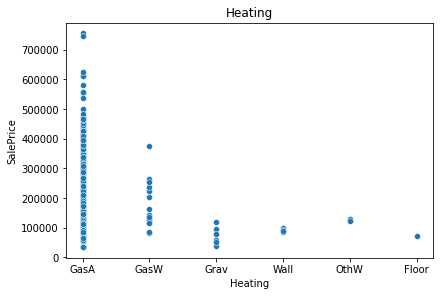

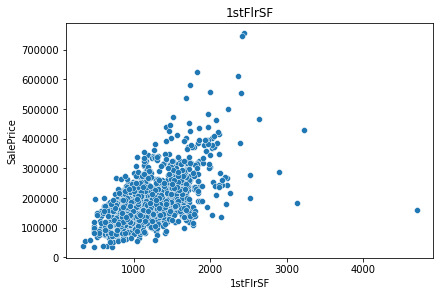

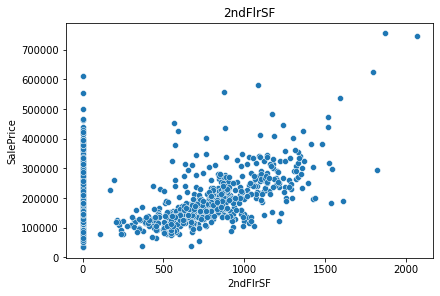

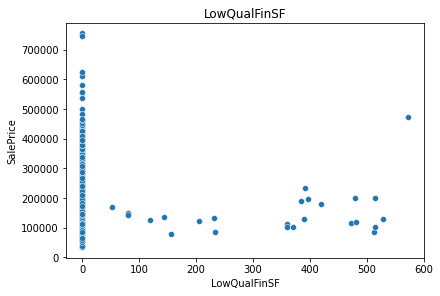

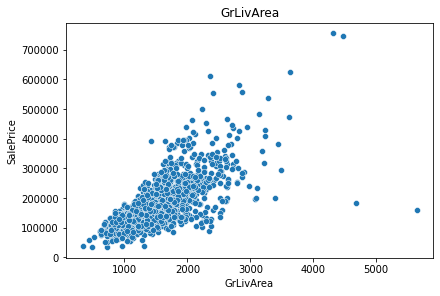

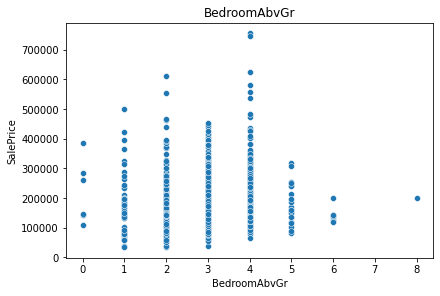

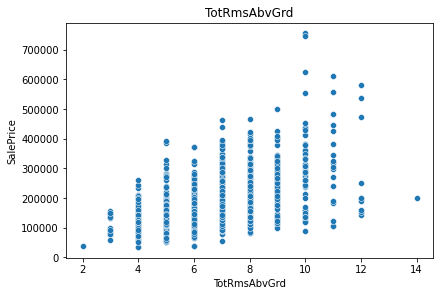

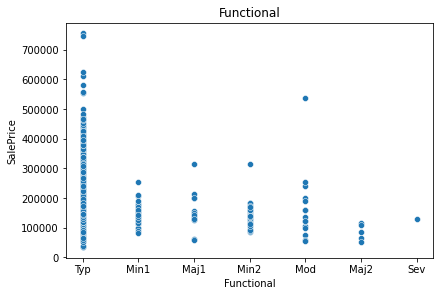

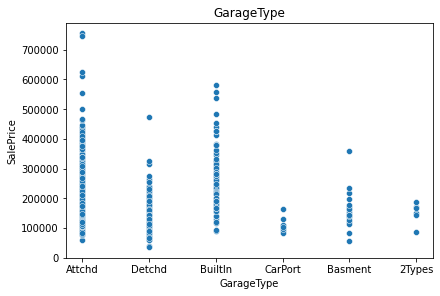

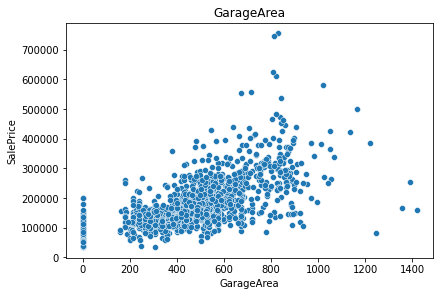

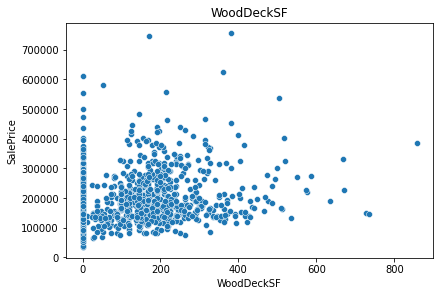

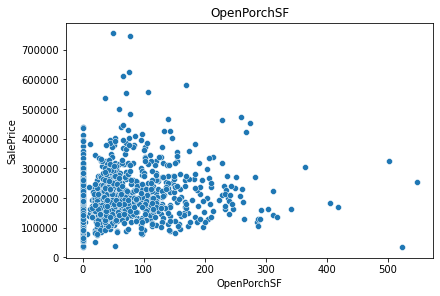

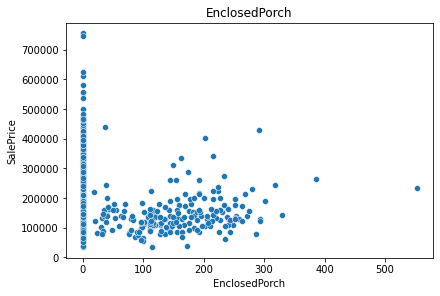

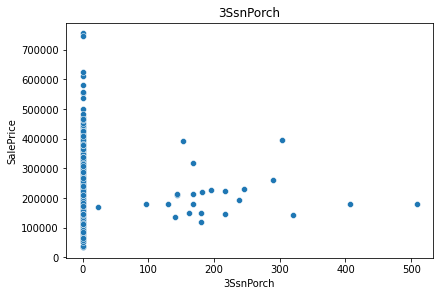

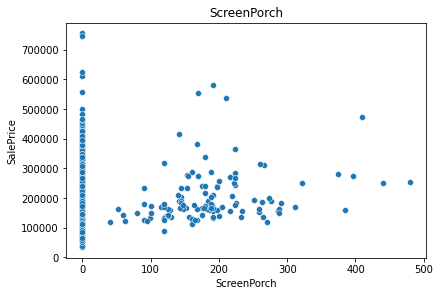

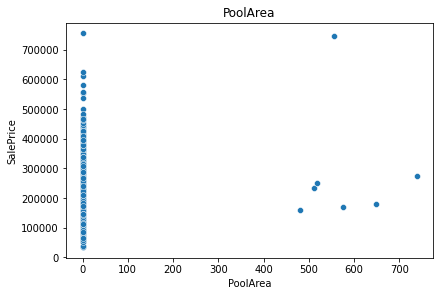

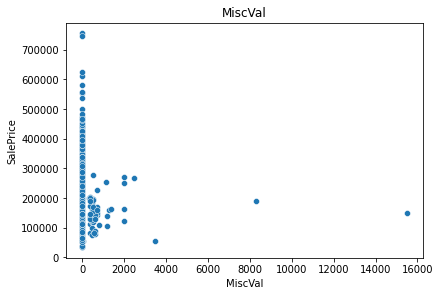

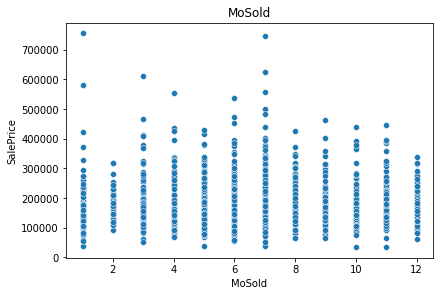

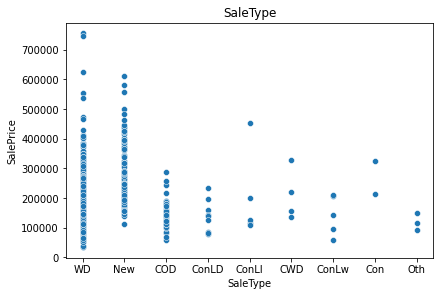

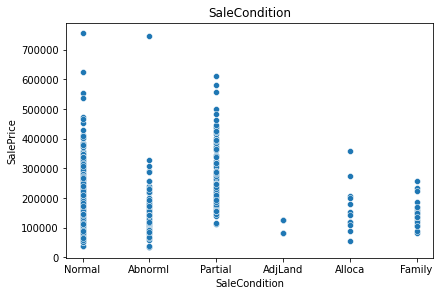

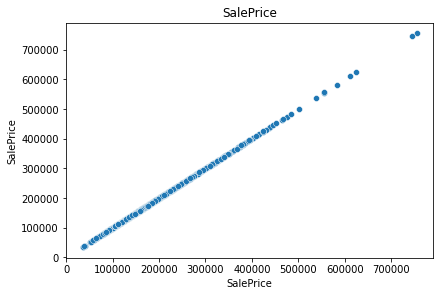

In [32]:
for feat in continuous_features:
    scatterplot(train_data,feat,"SalePrice")

As we can see from the graphs, **TotalBsmtSF**, **1stFlrSF**, **GrLivArea** and **GarageArea** have stong correlation with **SalePrice**

<div class="alert alert-block alert-danger">  
<h2><center><strong>As we can see from the graphs, TotalBsmtSF, 1stFlrSF, GrLivArea and GarageArea have stong correlation with SalePrice</strong></center></h2>
        
</div>

# Looking at the top 10 most correlated features with SalePrice 

<AxesSubplot:>

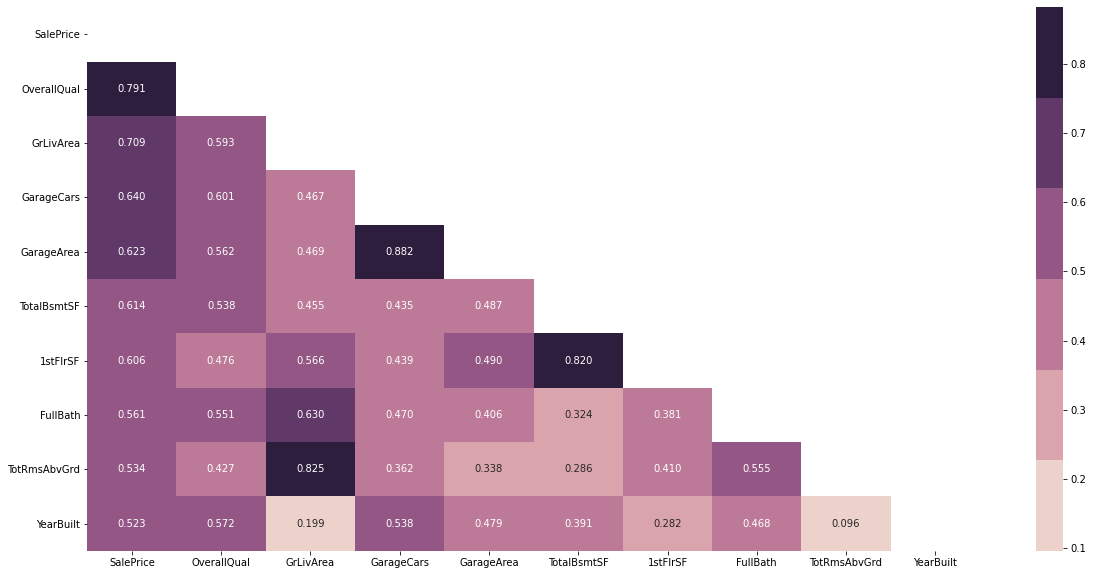

In [33]:
corr_feat = train_data.corr().nlargest(10,"SalePrice")["SalePrice"].index
cmap = np.corrcoef(train_data[corr_feat].values.T)
mask = np.zeros_like(cmap,dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(cmap,
            annot=True,
            fmt=".3f",
            annot_kws = {"size":10},
            cmap=sns.cubehelix_palette(),
            xticklabels = corr_feat.values,
            yticklabels = corr_feat.values,
            mask=mask)

<div class="alert alert-block alert-info">  
<h2><center><strong>Data Processing</strong></center></h2>
        
</div>

## Extract the SalePrice out

In [34]:
y = train_data["SalePrice"]

## Combining the train and test dataset

In [35]:
all_data = pd.concat([train_data,test_data],axis=0).reset_index(drop=True)

## Drop the SalePrice & Id columns

In [36]:
all_data = all_data.drop(["SalePrice","Id"],axis=1)

## A function for checking the missing values

In [37]:
def missing_value(df):
    number = df.isnull().sum().sort_values(ascending=False)
    number = number[number > 0]
    percentage = df.isnull().sum() *100 / df.shape[0]
    percentage = percentage[percentage > 0].sort_values(ascending=False)
    return  pd.concat([number,percentage],keys=["Total","Percentage"],axis=1)
missing_value(all_data)

,Total,Percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


## Imputing the Missing Values of all data

In [38]:
missing_col = ["Alley", "PoolQC", "MiscFeature","Fence",
               "FireplaceQu","GarageType","GarageFinish",
               "GarageQual","GarageCond",'BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2',
               'MasVnrType']

for col in missing_col:
    all_data[col] = all_data[col].fillna("None") 

In [39]:
#LotFrontage, Houses in the same neighborhood would have similar lotfrontage area. 
## filling the numerical features with median and mdeidan is the best suited method for numerical based features
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [40]:
#MasVnrArea, Same apply to the MasVnrArea
## filling the numerical features with median and mdeidan is the best suited method for numerical based features
all_data["MasVnrArea"] = all_data.groupby("Neighborhood")["MasVnrArea"].transform(lambda x:x.fillna(x.median()))

In [41]:
## MSSubClass
## Imputing the missing values with the Mode because mode fill the values with the most accuring values and best for the categorical features
all_data["MSZoning"] = all_data.groupby("MSSubClass")["MSZoning"].transform(lambda x: x.fillna(x.mode()[0]))

In [42]:
## GarageYrBlt
all_data.loc[all_data["GarageFinish"] == "None" , "GarageYrBlt"] = all_data["YearBuilt"]

In [43]:
## Check on the missing value
missing_value(all_data)

,Total,Percentage
BsmtFullBath,2,0.068517
BsmtHalfBath,2,0.068517
Functional,2,0.068517
Utilities,2,0.068517
BsmtFinSF1,1,0.034258
BsmtFinSF2,1,0.034258
Exterior1st,1,0.034258
GarageCars,1,0.034258
GarageArea,1,0.034258
KitchenQual,1,0.034258


In [44]:
### for the rest of the missing value
## categorical feature are replaced with the mode value
## numerical feature are replaced with the median value
missing_feat = missing_value(all_data).index

In [45]:
## getting categorical feature
missing_cat = [feat for feat in missing_feat if all_data[feat].dtype == np.object]

In [46]:
## filling the categorical features with mode and mode is the best suited method for categorical based features
for feat in missing_cat:
    all_data[feat] = all_data[feat].transform(lambda x: x.fillna(x.mode()[0]))

## numerical feature
missing_num = [feat for feat in missing_feat if feat not in missing_cat]

In [47]:
## filling the numerical features with median and mdeidan is the best suited method for numerical based features
for feat in missing_num:
    all_data[feat] = all_data[feat].transform(lambda x: x.fillna(x.median()))  
### Check on the missing value
missing_value(all_data)

,Total,Percentage


In [48]:
### Months ans years should be consider as categorical features
all_data["MoSold"] = all_data["MoSold"].astype(str)
all_data["YrSold"] = all_data["YrSold"].astype(str)
all_data["YearBuilt"] = all_data["YearBuilt"].astype(str)

### Normalizing the of Dependant Variable SalePrice

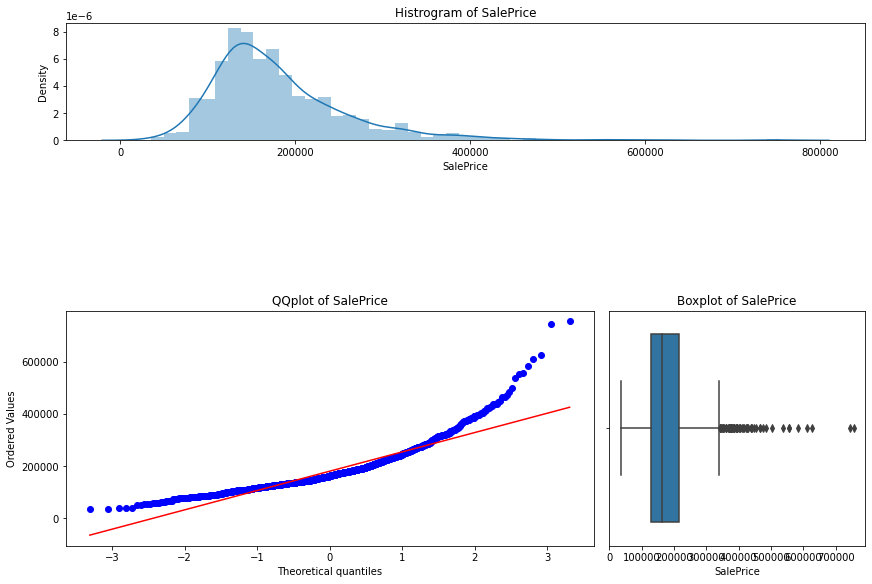

In [49]:
## Visualization
fig = plt.figure(constrained_layout=True, figsize=(12,8))
grid = gridspec.GridSpec(ncols=3, nrows=4, figure=fig)
 # Histrogram
ax1 = fig.add_subplot(grid[0,:])
sns.distplot(y,ax=ax1)
ax1.set_title("Histrogram of SalePrice")
# QQplot
ax2 = fig.add_subplot(grid[2:,:2])
stats.probplot(y,plot=ax2)
ax2.set_title("QQplot of SalePrice")
 # Boxplot
ax3 = fig.add_subplot(grid[2:,2])
sns.boxplot(y,ax=ax3,orient="v")
ax3.set_title("Boxplot of SalePrice")
plt.show()

<div class="alert alert-block alert-danger">  
<h2><center><strong>The above graphs show the following points</strong></center></h2>
    <li>The SalePrice is drawn from a normal distribution</li>
<li>The SalePrice is right skewed/ postively skewed, which indicates that most people are able to afford lower priced house.</li>
<li>Present some mutliple outliers in SalePrice</li>
        
</div>

In [50]:
##Check on the kurtosis & the skewness of SalePrice
print("Kurtosis: {}".format(y.kurt()))
print("Skewness: {}".format(y.skew()))

Kurtosis: 6.536281860064529
Skewness: 1.8828757597682129


<div class="alert alert-block alert-danger">  
<h2><center><strong>As indicated in the three charts above, SalePrice is postively-skewed. SalePrice is drawn from a Leptokurtic (distributions with wider tails, greater profusion of outliers) distributions.</strong></center></h2>
    <li>Skewness: Defined as the degree of distortion from the symmetrical bell curve or the normal curve.</li>
<li>Kurtosis: Defined as the measuer of the extreme values (also known as outliers) present in the distribution.</li>
        
</div>

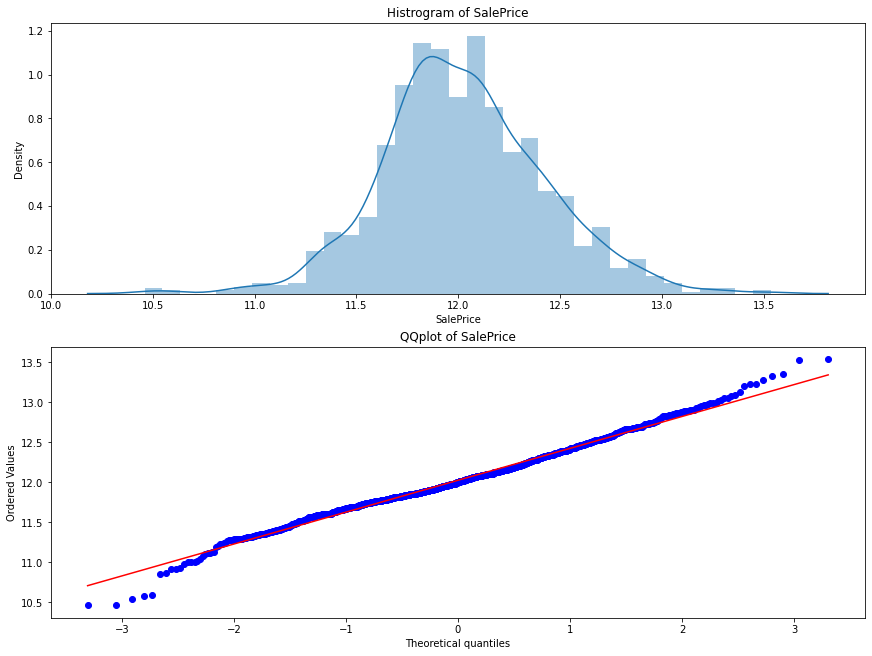

In [51]:
## Normalize the Dependant Variable(SalePrice)
y = np.log1p(y)

## Visualize of SalePrice after the normalization
fig,(ax1,ax2) = plt.subplots(2,1,constrained_layout=True,figsize=(12,9))

 # Histrogram
sns.distplot(y,ax=ax1)
ax1.set_title("Histrogram of SalePrice")
 # QQplot
stats.probplot(y,plot=ax2)
ax2.set_title("QQplot of SalePrice")

plt.show()

<div class="alert alert-block alert-danger">  
<h2><center><strong>Its better now !!</strong></center></h2>
    <li>Now let's check on the kurtosis and skewness value of SalePrice</li>
        
</div>

In [52]:
## Kurtosis and skewness of SalePrice
print("Kurtosis: {}".format(y.kurt()))
print("Skewness: {}".format(y.skew()))

Kurtosis: 0.809519155707878
Skewness: 0.12134661989685333


## Normalizing the of Independant Variables

In [53]:
## Check on the skewness and the kurtosis on continuos data only
numerical_feats = [feat for feat in all_data.columns if all_data[feat].dtype != np.object]
skewness = all_data[numerical_feats].skew().sort_values(ascending=False)
kurtosis = all_data[numerical_feats].kurt().sort_values(ascending=False)

df_norm = pd.concat([skewness,kurtosis],axis=1,keys=["Skewness","Kurtosis"])

df_norm

,Skewness,Kurtosis
MiscVal,21.958480,564.074582
PoolArea,16.907017,298.633144
LotArea,12.829025,264.952310
LowQualFinSF,12.094977,174.932812
3SsnPorch,11.381914,149.409834
KitchenAbvGr,4.304467,19.777937
BsmtFinSF2,4.148275,18.844397
EnclosedPorch,4.005950,28.377909
ScreenPorch,3.948723,17.776704
BsmtHalfBath,3.933616,14.861472


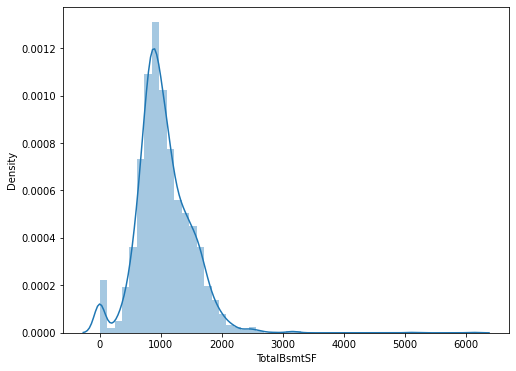

In [54]:
### Feature with skewness greater than 0.5 or lower than -0.5 are considered highly skewed
high_skew = skewness[abs(skewness) > 0.5].sort_values(ascending=False)

## Visualization of TotalBsmtSF
plt.figure(figsize=(8,6))
sns.distplot(all_data["TotalBsmtSF"])
plt.show()

In [55]:
## Look at its kurtosis and skewness value
print("Kurtosis: {}".format(all_data["TotalBsmtSF"].kurt()))
print("Skewness: {}".format(all_data["TotalBsmtSF"].skew()))

Kurtosis: 9.155317679440493
Skewness: 1.1632139475611367


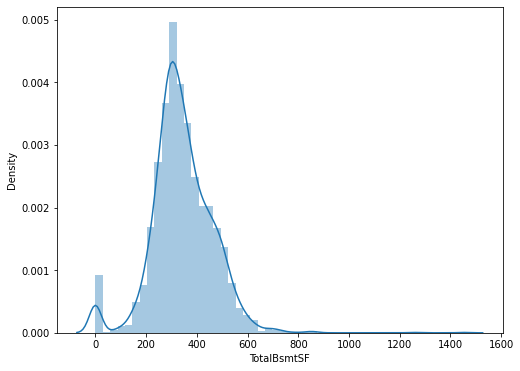

In [56]:
## import packages
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


## Normalization of independant variables
for feat in high_skew.index:
    all_data[feat] = boxcox1p(all_data[feat], boxcox_normmax(all_data[feat] + 1))
## Visualization of TotalBsmtSF after normalization
plt.figure(figsize=(8,6))
sns.distplot(all_data["TotalBsmtSF"])
plt.show()


In [57]:
## Look at its kurtosis and skewness value after the normalization
print("Kurtosis: {}".format(all_data["TotalBsmtSF"].kurt()))
print("Skewness: {}".format(all_data["TotalBsmtSF"].skew()))

Kurtosis: 4.705259987461486
Skewness: 0.37016513262841677


### Now the data is normalized well !!

<div class="alert alert-block alert-success">  
<h2><center><strong> Adding the new features from the existing featrures because to make the model more distinguish for price predictions  !!</strong></center></h2>
        
</div>

In [58]:
## TotalHouseSF: The total Square Foot of the house
all_data["TotalHouseSF"] = all_data["TotalBsmtSF"] + all_data["1stFlrSF"] + all_data["2ndFlrSF"]

In [59]:
## TotalBath: The total number of bathrooms in the house
all_data["TotalBath"] = all_data["BsmtFullBath"] + all_data["BsmtFullBath"]*0.5 + all_data["FullBath"] + all_data["HalfBath"]*0.5

In [60]:
## TotalPorchSF: The total square foot of porch area of the house
all_data["TotalPorchSF"] = all_data["WoodDeckSF"] + all_data["OpenPorchSF"] + all_data["EnclosedPorch"] + all_data["3SsnPorch"] + all_data["ScreenPorch"] 

In [61]:
## HouseRemodAge: Number of years the house being remodded to the time it was sold
all_data["HouseRemodAge"] = all_data["YrSold"].astype(int) - all_data["YearRemodAdd"]
all_data.loc[all_data["HouseRemodAge"] < 0, "HouseRemodAge"] = 0 

In [62]:
## function 
presence = lambda x: 1 if x > 0 else 0

In [63]:
## HasPool: Presence of pool
all_data["HasPool"] = all_data["PoolArea"].transform(presence)

In [64]:
## Has2ndFlr: Presence of second floor
all_data["Has2ndFlr"] = all_data["2ndFlrSF"].transform(presence)

In [65]:
## HasGarage: Presence of garage
all_data["HasGarage"] = all_data["GarageArea"].transform(presence)

In [66]:
## HasBsmt: Presence of basement
all_data["HasBsmt"] = all_data["TotalBsmtSF"].transform(presence)

In [67]:
## HasFirePlace: Presence of fireplace
all_data["HasFirePlace"] = all_data["Fireplaces"].transform(presence)

## Deleting the Biased Features


In [68]:
## Bias feature reducer
bias_feat = []
for feat in all_data.columns:
    counts = all_data[feat].value_counts().iloc[0] ## mode value counts
    if counts / len(all_data) * 100 > 99.94:
        bias_feat.append(feat)

bias_feat

['Utilities']

In [69]:
## Remove the bias feature from the dataset
all_data = all_data.drop(bias_feat,axis=1)

## Coverting the categorical features into numeric form by applying the get_dummies function

In [70]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)

# Now splitting the data for training and testing with same index ID's

In [71]:
n = len(y)
train_data = all_data[:n]
test_data = all_data[n:]

# Splitting the Train data into 70% for training and 30% for testing 

In [72]:
X_train, X_test, y_train, y_test =  train_test_split(train_data,y,test_size=0.33,random_state=42)
print("Shapes of data: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes of data:  (978, 441) (482, 441) (978,) (482,)


<div class="alert alert-block alert-info">  
<h2><center><strong> Building the models for training and testing</strong></center></h2>
        
</div>

In [73]:
## Create an empty list
pipeline_models = []

# Assign all models into the list
seed = 42
models = [Ridge(tol=10,random_state=seed),
          Lasso(tol=1,random_state=seed),
          RandomForestRegressor(random_state=seed),
          ExtraTreesRegressor(random_state=seed),
          GradientBoostingRegressor(),
          DecisionTreeRegressor(),
          KNeighborsRegressor()]

model_names = ["Ridge","Lasso","RFR","ETR","GBoost_Reg","DT_Reg","KNN_Reg"]

## Assign each model to a pipeline
for name, model in zip(model_names,models):
    pipeline = ("Scaled_"+ name,
                Pipeline([("Scaler",StandardScaler()),
                          (name,model)
                         ]))
    pipeline_models.append(pipeline)

<div class="alert alert-block alert-info">  
<h2><center><strong> Training the models</strong></center></h2>
        
</div>

In [74]:
## Create a dataframe to store all the models' cross validation score
evaluate = pd.DataFrame(columns=["model","cv","std"])


## Encoded dataset
for name,model in pipeline_models:
    kfold = KFold(n_splits=7,shuffle=True,random_state=42)
    cv = cross_val_score(model, X_train, y_train, cv=kfold, n_jobs=-1, scoring="r2")
    
    row = evaluate.shape[0]
    evaluate.loc[row,"model"] = name
    evaluate.loc[row,"cv"] = round(cv.mean(),3)
    evaluate.loc[row,"std"] = "+/- {}".format(round(cv.std(),4))
    
    evaluate = evaluate.sort_values("cv",ascending=False)

[Text(0, 0, 'Scaled_GBoost_Reg'),
 Text(1, 0, 'Scaled_RFR'),
 Text(2, 0, 'Scaled_ETR'),
 Text(3, 0, 'Scaled_Ridge'),
 Text(4, 0, 'Scaled_KNN_Reg'),
 Text(5, 0, 'Scaled_DT_Reg'),
 Text(6, 0, 'Scaled_Lasso')]

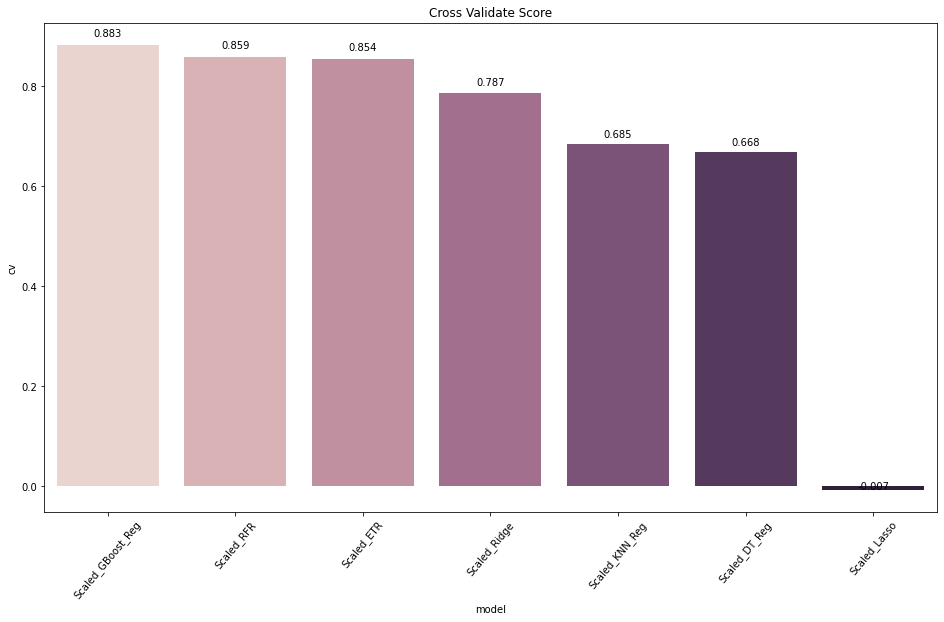

In [75]:
## Visualization
fig, ax = plt.subplots(1,1,sharey=False,figsize=(16,9))

## Encoded dataset
bar = sns.barplot(evaluate["model"], evaluate["cv"],ax=ax,palette = sns.cubehelix_palette(evaluate.shape[0]))
for rec in bar.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width()/2, height*1.02,height,ha="center")
ax.set_title("Cross Validate Score")
ax.set_xticklabels(evaluate["model"].to_list(),rotation =50)

<div class="alert alert-block alert-danger">  
<h2><center><strong> Best Model is Gradient Boosting Regressor</strong></center></h2>
        
</div>

In [76]:
final_model = GradientBoostingRegressor()
final_model = final_model.fit(X_train,y_train)

<div class="alert alert-block alert-success">  
<h1><center><strong> Submitting the predicted prices of house on test data</strong></center></h1>
        
</div>

In [77]:
submission_results = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission_results.iloc[:,1] = np.floor(np.expm1(final_model.predict(test_data)))
submission_results.to_csv('submission_results', index=False)

# <img src="https://thumbs.dreamstime.com/t/bright-colorful-thank-you-banner-vector-overlapping-letters-118244535.jpg">